In [1]:
import meep as mp
import math
import matplotlib.pyplot as plt
from meep import mpb
import numpy as np

Specifying the different adjustable parameters
___
Parameters kept constant through the band calculation



In [2]:
num_bands=15 #number of eigenstates(bands) computed at each k point
lattice_constant=0.963 #in units of the fundamental length a ,which here is 1 micron(lattice constant=900 nm)

Parameters varied through the band calculation (assigned default values here)

In [3]:
thickness=0.110 #thickness=90 nm from Shanhui's paper
radius=0.10602 #radius=153 nm

Defining the k-points using the three corners of the irreducible Brillouin zone

In [4]:
k_points=[mp.Vector3(),mp.Vector3(0.5),mp.Vector3(0.5,0.5),mp.Vector3()] #Gamma,X,M,Gamma

In [5]:
k_points=mp.interpolate(4,k_points)#this takes the k-points and linearly interpolates four new points between each pair of consecutive points

In [6]:
k_points

[Vector3<0.0, 0.0, 0.0>,
 Vector3<0.1, 0.0, 0.0>,
 Vector3<0.2, 0.0, 0.0>,
 Vector3<0.30000000000000004, 0.0, 0.0>,
 Vector3<0.4, 0.0, 0.0>,
 Vector3<0.5, 0.0, 0.0>,
 Vector3<0.5, 0.1, 0.0>,
 Vector3<0.5, 0.2, 0.0>,
 Vector3<0.5, 0.30000000000000004, 0.0>,
 Vector3<0.5, 0.4, 0.0>,
 Vector3<0.5, 0.5, 0.0>,
 Vector3<0.4, 0.4, 0.0>,
 Vector3<0.3, 0.3, 0.0>,
 Vector3<0.19999999999999996, 0.19999999999999996, 0.0>,
 Vector3<0.09999999999999998, 0.09999999999999998, 0.0>,
 Vector3<0.0, 0.0, 0.0>]

Specifying the geometry of the crystal and lattice directions

In [22]:
#setting the geometry of the system
geometry=[mp.Block(center=mp.Vector3(0,0,0),size=mp.Vector3(mp.inf,mp.inf,thickness),e1=mp.Vector3(1,0,0),e2=mp.Vector3(0,1,0),e3=mp.Vector3(0,0,1),material=mp.Medium(epsilon=12)),

          mp.Cylinder(center=mp.Vector3(0,0,0),radius=radius,height=thickness,material=mp.air),
         
          mp.Block(center=mp.Vector3(0,0,0.55*thickness),size=mp.Vector3(mp.inf,mp.inf,0.1*thickness),e1=mp.Vector3(1,0,0),e2=mp.Vector3(0,1,0),e3=mp.Vector3(0,0,1),material=mp.air),
         #Slab of air above the PCS
          mp.Block(center=mp.Vector3(0,0,-0.05*thickness),size=mp.Vector3(mp.inf,mp.inf,0.1*thickness),e1=mp.Vector3(1,0,0),e2=mp.Vector3(0,1,0),e3=mp.Vector3(0,0,-1),material=mp.air)
         #slab of air below the PCS
         ]



#setting the lattice vectors of the supercell
geometry_lattice=mp.Lattice(size=mp.Vector3(lattice_constant,lattice_constant,1.2*thickness),
                            basis1=mp.Vector3(1,0,0),
                            basis2=mp.Vector3(0,1,0))

#defining the size of the computational cell
resolution=32

Invoking the mode solver object

In [9]:
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution,
                    default_material=mp.Medium(epsilon=1))
#creating a ModeSolver object with all the arguments as specified

Computing bands for the TM modes

In [10]:
ms.run_tm()

Initializing eigensolver data
Computing 15 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 32 x 32 x 5.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.963, 0, 0)
     (0, 0.963, 0)
     (0, 0, 0.132)
Cell volume = 0.122413
Reciprocal lattice vectors (/ 2 pi):
     (1.03842, -0, 0)
     (-0, 1.03842, -0)
     (0, -0, 7.57576)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1e+20,0.11)
          axes (1,0,0), (0,1,0), (0,0,1)
     cylinder, center = (0,0,0)
          radius 0.10602, height 0.11, axis (0, 0, 1)
     block, center = (0,0,0.0605)
          size (1e+20,1e+20,0.011)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-0.0055)
          size (1e+20,1e+20,0.011)
          axes (1,0,0), (0,1,0), (0,0,-1)
Geometric object tree has depth 4 and 105 object nodes (vs. 4 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: zodd.
Initia

In [11]:
tm_freqs=ms.all_freqs
tm_gaps=ms.gap_list

Computing bands for the TE modes


In [12]:
ms.run_te()

Initializing eigensolver data
Computing 15 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 32 x 32 x 5.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.963, 0, 0)
     (0, 0.963, 0)
     (0, 0, 0.132)
Cell volume = 0.122413
Reciprocal lattice vectors (/ 2 pi):
     (1.03842, -0, 0)
     (-0, 1.03842, -0)
     (0, -0, 7.57576)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1e+20,0.11)
          axes (1,0,0), (0,1,0), (0,0,1)
     cylinder, center = (0,0,0)
          radius 0.10602, height 0.11, axis (0, 0, 1)
     block, center = (0,0,0.0605)
          size (1e+20,1e+20,0.011)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-0.0055)
          size (1e+20,1e+20,0.011)
          axes (1,0,0), (0,1,0), (0,0,-1)
Geometric object tree has depth 4 and 105 object nodes (vs. 4 actual objects)
Initializing epsilon function...
Solving for band polarization: zeven.
Initializing fields to ran

In [13]:
te_freqs=ms.all_freqs
te_gaps=ms.gap_list

Printing the lattice cross-section taken along a plane parallel to the z-axis

In [14]:
md=mpb.MPBData(rectify=True,periods=3,resolution=32)
eps=ms.get_epsilon()
converted_eps=md.convert(eps)

epsilon: 1-12, mean 10.6923, harm. mean 8.04872, 97.0117% > 1, 88.1116% "fill"
real part range: 1 .. 12


In [15]:
print(converted_eps.shape)

(92, 92, 13)


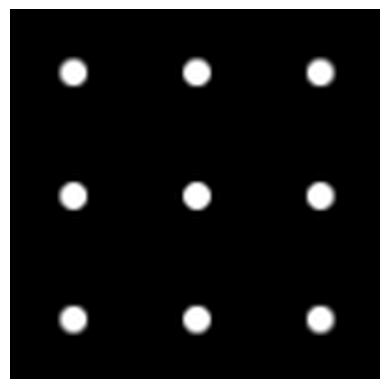

In [17]:
plt.imshow(converted_eps.T[1], interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

In [18]:
print(np.max(tm_freqs))
print(np.max(te_freqs))
print(max(np.max(tm_freqs),np.max(te_freqs)))

0.9066084085719925
0.7245666766642221
0.9066084085719925


Defining the light cone for band structure plots

In [19]:
def light_cone(x):
    c=3
    k_x=k_points[x][0]
    k_y=k_points[x][1]
    w=c*np.sqrt((k_x**2)+(k_y**2))
    return w

In [20]:
#Converting c/a into 10^14 Hz
tm_freqs=tm_freqs*3
te_freqs=te_freqs*3

Plotting the band structure for TM and TE modes

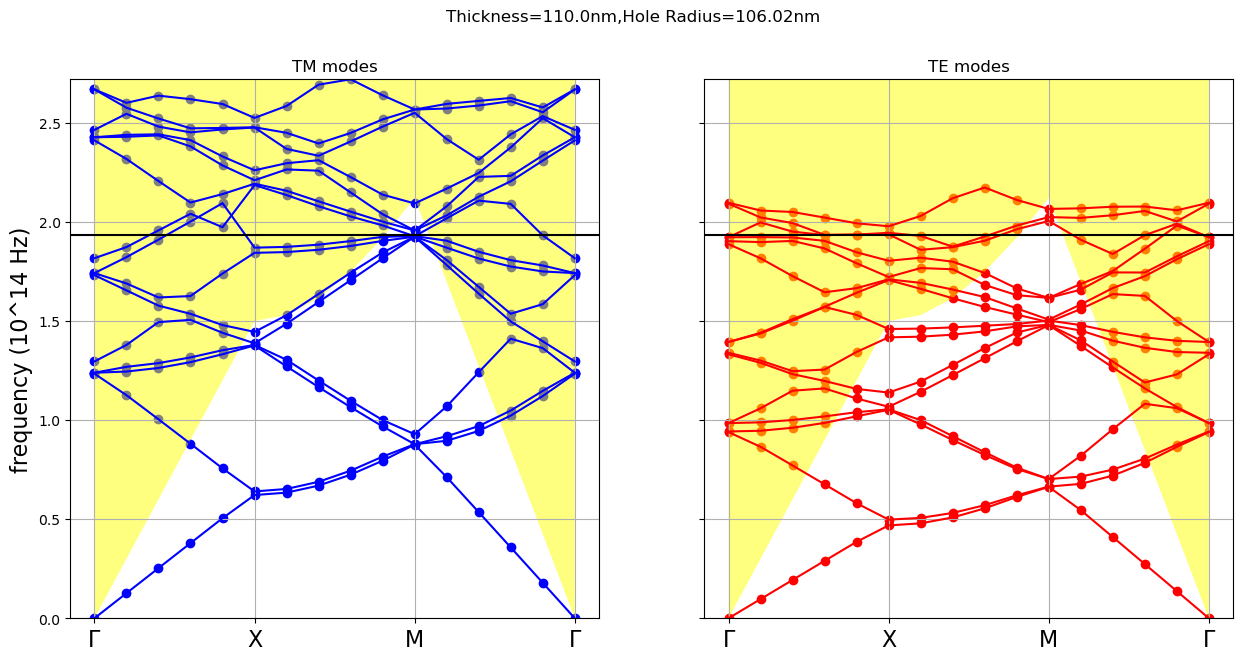

In [21]:


fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(15,7))
x=range(len(tm_freqs))
#Plot bands
#Scatter plot for multiple y values
for xz, tmz, tez in zip(x, tm_freqs, te_freqs):
    ax1.scatter([xz]*len(tmz),tmz,color='blue')
    ax2.scatter([xz]*len(tez),tez,color='red')
ax1.plot(tm_freqs,color='blue')
ax2.plot(te_freqs,color='red')

#Setting y-axis limits
ymin=0
ymax=max(np.max(tm_freqs),np.max(te_freqs))
ax1.set_ylim([ymin,ymax])


# Plot gaps
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1]*3, gap[2]*3, color='blue', alpha=0.2)

for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1]*3, gap[2]*3, color='red', alpha=0.2)

#Plotting light cones
light_line=[light_cone(i) for i in x]
ax1.fill_between(x,light_line,ymax,facecolor='yellow',alpha=0.5)
ax2.fill_between(x,light_line,ymax,facecolor='yellow',alpha=0.5)

for ax in [ax1,ax2]:
        ax.axhline(y=1.935,color='black',linestyle='-')

#x-axis label
points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'X', 'M', 'Γ']
for ax in [ax1,ax2]:
    ax.set_xticks(tick_locs)
    ax.set_xticklabels(tick_labs, size=16)

#y-axis label
ax1.set_ylabel('frequency (10^14 Hz)', size=16)

#Setting titles
ax1.set_title('TM modes')
ax2.set_title('TE modes')
fig.suptitle('Thickness={}nm,Hole Radius={}nm'.format(round(thickness*1000,2),round(radius*1000,2)))

#Setting grid
ax1.grid(True)
ax2.grid(True)

plt.show()

